In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import csv
import pandas as pd
from matplotlib import pyplot as plt
from random import random
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal

#For pulsar daaset

df = pd.read_csv('drug_resp.csv',header = None) 
# Separating out the features
x = df.loc[:, :].values
# Separating out the target
#y = df.loc[:,['y']].values
# Standardizing the features
x.shape


(212, 43)

In [24]:
x = x.T

In [39]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
#finalDf = pd.concat([principalDf, df[[8]]], axis = 1) #uncomment for pulsar dataset
#finalDf = pd.concat([principalDf, df['y']], axis = 1) #uncomment for housing dataset 
finalDf = principalDf

print(principalDf.shape)
principalDf.head()

(43, 2)


,principal component 1,principal component 2
0,-6.426840,0.328123
1,4.170656,-1.023680
2,3.496549,-10.860561
3,32.173993,-3.658262
4,-4.133369,1.716888


In [ ]:
#********************** Dont run for housing dataset***************************************
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = [0, 1]            # uncomment for pulsar dataset 
#targets = [1, 2, 3, 4]      # uncomment for housing dataset

#colors = ['r', 'g']
colors = ['r', 'g', 'b', 'm']
for target, color in zip(targets,colors):
    #indicesToKeep = finalDf[8] == target    # uncomment for pulsar dataset
    indicesToKeep = finalDf['y'] == target   # uncomment for housing dataset
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [40]:
feat = ['principal component 1', 'principal component 2']
X = finalDf.loc[:, feat].values
print(X)
X.shape

[[ -6.42684013   0.32812285]
 [  4.17065568  -1.02368027]
 [  3.49654877 -10.86056079]
 [ 32.17399261  -3.65826161]
 [ -4.13336888   1.71688811]
 [-10.97258291  13.73151507]
 [-10.40825772   1.90510813]
 [ -3.53718426   3.05780153]
 [ -0.3722114   -3.0249014 ]
 [-23.90139302   0.52839703]
 [ -0.06832835   0.26665706]
 [ -4.37912579   7.55926413]
 [ -5.81937572  -4.84583264]
 [  1.54402603   0.06525788]
 [ -6.41587614  -4.47358923]
 [  5.77775189   9.13111576]
 [ 13.5600287   -4.47452982]
 [ 10.10843713   2.08092562]
 [  0.54841236  -3.7984931 ]
 [ -2.57750571  -3.00146025]
 [  1.09795854  -0.31643662]
 [  2.38329389  -4.5579087 ]
 [  3.2376309  -10.06017371]
 [ -1.60620083   2.11749153]
 [  3.80040693 -12.17603372]
 [ -3.92671499  -0.63957599]
 [ -5.39226794  -3.22624167]
 [  3.33141489   3.91679585]
 [  9.56546603  14.31021505]
 [ -4.21681279  19.28049847]
 [  4.17132675   4.7726367 ]
 [ -2.20913693   8.90029435]
 [  4.21994942  -0.41809867]
 [ -1.70843197   2.46881202]
 [ 14.03539983

(43, 2)

In [41]:
#style.use('fivethirtyeight')
class GMM:
    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    
    """Define a function which runs for iterations, iterations"""
    def run(self):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
           
                    
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,0]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)
        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
            
        """Plot the initial state"""    
        fig = plt.figure(figsize=(8,8))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:,0],self.X[:,1])
        ax0.set_title('Initial state')
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        
        for i in range(self.iterations):               
            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))
            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)
       
            """M Step"""
            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []
            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)
                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic)) 
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))
            
        fig2 = plt.figure(figsize=(8,8))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()
    
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # PLot the point onto the fittet gaussians
        fig3 = plt.figure(figsize=(8,8))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
         


[1.0, 0.0]

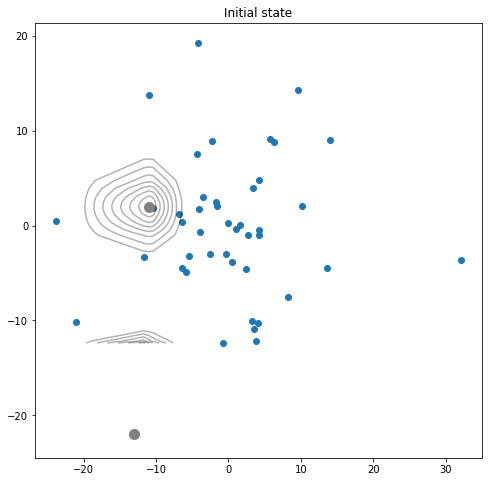

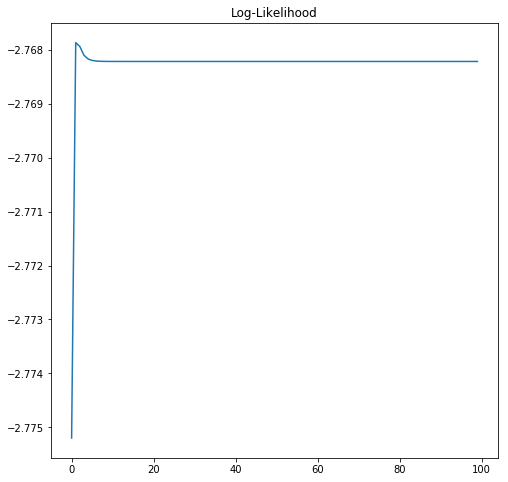

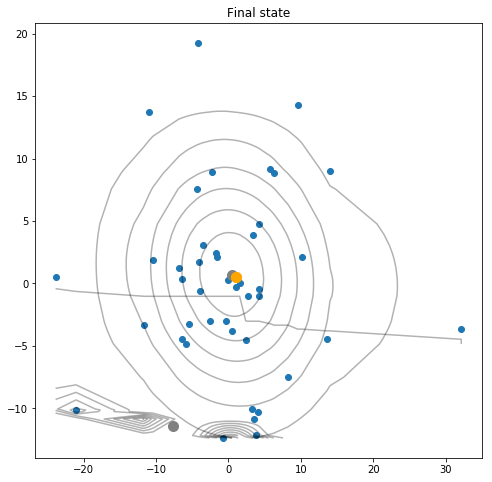

In [42]:

GMM = GMM(X,2,100)     
GMM.run()
GMM.predict([[1.0,0.5]])